In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import xlrd
import numpy as np
from matplotlib_venn import venn2, venn3

# THIS BEGINS THE INTERSECTION OF WF AND NON INF PATIENTS

In [6]:
#Read data

mapp='WF'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_WF = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    df_WF = df_WF.append(data)  # appends all data

mapp='peptide_sample_ninf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_ninf = pd.DataFrame()
non_inf_patients=[]
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    non_inf_patients.append(data['Peptide'])
    df_ninf = df_ninf.append(data)  # appends all data

mapp='peptide_sample_inf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_inf = pd.DataFrame()
inf_patients=[]
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    inf_patients.append(data['Peptide'])
    df_inf = df_inf.append(data)  # appends all data

df_ninf['count'] = 1
df_WF['count'] = 1
df_inf['count']=1


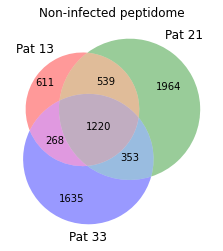

In [3]:
v=venn3([set(non_inf_patients[0]),set(non_inf_patients[1]),set(non_inf_patients[2])], set_labels=('Pat 13','Pat 21','Pat 33'))
plt.title('Non-infected peptidome');


Text(0.5, 1.0, 'Infected peptidome')

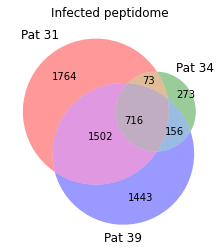

In [4]:
venn3([set(inf_patients[0]),set(inf_patients[1]),set(inf_patients[2])], set_labels=('Pat 31', 'Pat 34','Pat 39'))
plt.title('Infected peptidome')

In [7]:
#Wound fluid
# sorts out if feature<4
df_WF_all=pd.DataFrame()
df_WF_all['Peptide']=df_WF['Peptide']
df_WF = df_WF.loc[(df_WF['#Feature'] >= 4)] 
df_WF = df_WF.groupby(['Accession','Peptide']).sum()
df_WF.reset_index(['Peptide'], inplace=True)
df_WF = df_WF[['Peptide', '#Feature', '#Feature WF1','#Feature WF2', '#Feature WF 3', '#Feature WF4','#Feature WF5','count']]
df_WF = df_WF.sort_values(['count','#Feature'], ascending=False)

#Non-infected patients
df_ninf_all=pd.DataFrame()
df_ninf_all['Peptide']=df_ninf['Peptide']
df_ninf = df_ninf.loc[(df_ninf['#Feature'] >= 4)] # sorts out if feature<4

df_ninf = df_ninf.groupby(['Accession','Peptide']).sum()
df_ninf.reset_index(['Peptide'], inplace=True)
df_ninf = df_ninf[['Peptide','#Feature','#Feature Sample 13', '#Feature Sample 21', '#Feature Sample 33','count',]]
df_ninf = df_ninf.sort_values(['count','#Feature'], ascending=False)

#infected patients
df_inf_all=pd.DataFrame()
df_inf_all['Peptide']=df_inf['Peptide']
df_inf = df_inf.loc[(df_inf['#Feature'] >= 4)] # sorts out if feature<4

df_inf = df_inf.groupby(['Accession','Peptide']).sum()
df_inf.reset_index(['Peptide'], inplace=True)
df_inf = df_inf[['Peptide','#Feature','#Feature Sample 31', '#Feature Sample 34', '#Feature Sample 39','count',]]
df_inf = df_inf.sort_values(['count','#Feature'], ascending=False)
df_WF_all

,Peptide
0,AAFNSGKVDIV
1,AAFNSGKVDIVAI
2,AAGSDVDIDMAFILDSAETT
3,AAHLPAEFTPA
4,AAHLPAEFTPAV
...,...
2915,YVDVLKDSGRDYV
2916,YVNKEIQNAV
2917,YVNKEIQNAVNGV
2918,YWKALGISPF


In [39]:
df_ninf_same=df_ninf.loc[(df_ninf['count']==3)]
df_WF_same=df_WF.loc[(df_WF['count']==5)]

df_WF_ninf=df_WF_same.append(df_ninf_same)
df_WF_ninf.reset_index()
df_WF_ninf=df_WF_ninf.groupby(['Accession','Peptide']).sum()
df_WF_ninf.sort_values(['count','#Feature'], ascending=False)
df_ninf_same


,Peptide,#Feature,#Feature Sample 13,#Feature Sample 21,#Feature Sample 33,count
Accession,,,,,,
sp|P02671|FIBA_HUMAN,MELERPGGNEITR,94,18.0,35.0,40.0,3
sp|P02671|FIBA_HUMAN,MELERPGGNEIT,69,18.0,32.0,18.0,3
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,ANALAHKYH,46,8.0,12.0,26.0,3
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,GVANALAHKYH,46,13.0,13.0,20.0,3
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,AGVANALAHKYH,41,11.0,12.0,18.0,3
...,...,...,...,...,...,...
sp|P69905|HBA_HUMAN,SLDKFLASVSTV,12,4.0,4.0,4.0,3
sp|P69905|HBA_HUMAN,SLDKFLASVSTVLT,12,4.0,4.0,4.0,3
sp|P69905|HBA_HUMAN,SPADKTNVK,12,4.0,4.0,4.0,3


Text(0.5, 1.0, 'WF intersection as part of total WF')

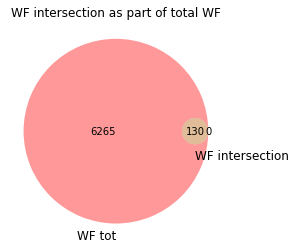

In [7]:
venn2([set(df_WF_all['Peptide']), set(df_WF_same['Peptide'])], set_labels = ('WF tot', 'WF intersection'))
plt.title('WF intersection as part of total WF')

Text(0.5, 1.0, 'WF vs non-infected overlap')

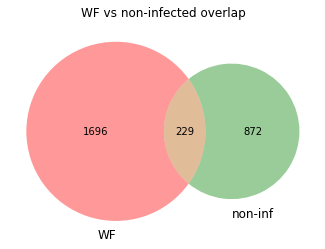

In [8]:
venn2([set(df_WF['Peptide']), set(df_ninf['Peptide'])], set_labels = ('WF', 'non-inf'))
plt.title('WF vs non-infected overlap')

In [46]:
df_inf_same=df_inf.loc[(df_inf['count']==3)]

df_ninf_inf=df_ninf_same.append(df_inf_same)
df_ninf_inf.reset_index()
df_ninf_inf=df_ninf_inf.groupby(['Accession','Peptide']).sum()
df_ninf_inf=df_ninf_inf.sort_values(['count','#Feature'], ascending=False)
df_ninf_inf['Difference (ninf-inf)']=(df_ninf_inf['#Feature Sample 13']+df_ninf_inf['#Feature Sample 21']+df_ninf_inf['#Feature Sample 33'])-(df_ninf_inf['#Feature Sample 31']+df_ninf_inf['#Feature Sample 34']+df_ninf_inf['#Feature Sample 39'])
df_ninf_inf.sort_values(['Difference (ninf-inf)'])[0:30]

#Feature  \
Accession                               Peptide                        
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN AGVANALAHKYH             156   
                                        GVANALAHKYH              155   
sp|P69905|HBA_HUMAN                     AHVDDMPNALSAL             61   
sp|P68871|HBB_HUMAN                     SDGLAHLDNLKGTFA           56   
                                        VHLTPEEKSAV              102   
                                        DGLAHLDNLKGTFA            53   
sp|P69905|HBA_HUMAN                     HAGEYGAEALERM             53   
                                        STVLTSKYR                102   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN ANALAHKYH                142   
sp|P69905|HBA_HUMAN                     VDDMPNALSAL               48   
                                        GEYGAEALERM               46   
                                        SDLHAHKLRVDPV             45   
                                        SVSTVLTSKYR               45   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN SDGLAHLDNLKGTF            45   
sp|P69905|HBA_HUMAN                     HVDDMPNAL                 42   
sp|P68871|HBB_HUMAN                     GLAHLDNLKGTFA             40   
sp|P69905|HBA_HUMAN                     DLSHGSAQVKGHGK            35   
                                        LSFPTTK                   35   
                                        TNAVAHVDDMPNALSAL         34   
                                        SLDKFLASVSTVLTSKYR        34   
sp|P68871|HBB_HUMAN                     PEEKSAV                   33   
sp|P69905|HBA_HUMAN                     GEYGAEALERMF              32   
                                        HVDDMPNALSAL              32   
sp|P02652|APOA2_HUMAN                   TDYGKDLMEKV               32   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN HLTPEEK                   78   
                                        NALAHKYH                  92   
sp|P69905|HBA_HUMAN                     HASLDKFLASV               28   
                                        EYGAEALERMFL              26   
                                        VHASLDKFLASV              26   
                                        AHVDDMPNAL                55   

                                                            #Feature Sample 13  \
Accession                               Peptide                                  
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN AGVANALAHKYH                      11.0   
                                        GVANALAHKYH                       13.0   
sp|P69905|HBA_HUMAN                     AHVDDMPNALSAL                      0.0   
sp|P68871|HBB_HUMAN                     SDGLAHLDNLKGTFA                    0.0   
                                        VHLTPEEKSAV                        8.0   
                                        DGLAHLDNLKGTFA                     0.0   
sp|P69905|HBA_HUMAN                     HAGEYGAEALERM                      0.0   
                                        STVLTSKYR                          8.0   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN ANALAHKYH                          8.0   
sp|P69905|HBA_HUMAN                     VDDMPNALSAL                        0.0   
                                        GEYGAEALERM                        0.0   
                                        SDLHAHKLRVDPV                      0.0   
                                        SVSTVLTSKYR                        0.0   
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN SDGLAHLDNLKGTF                     0.0   
sp|P69905|HBA_HUMAN                     HVDDMPNAL                          0.0   
sp|P68871|HBB_HUMAN                     GLAHLDNLKGTFA                      0.0   
sp|P69905|HBA_HUMAN                     DLSHGSAQVKGHGK                     0.0   
                                        LSFPTTK                            0.0   
                                        TNAVAHVDDMPNALSAL                  0.0   
                                 

,_merge,Peptide
0,left_only,AGVANALAHKYH
102,left_only,KQTALVELVK
101,left_only,SALEEYTKKLNTQ
100,left_only,ADALTNAVAH
99,left_only,HDTSLKPI
...,...,...
277,right_only,VGAHAGEYGAEALE
143,both,VLSPADKTN
141,both,SLDKFLASVSTVLT
132,both,DAVTYTEHAK


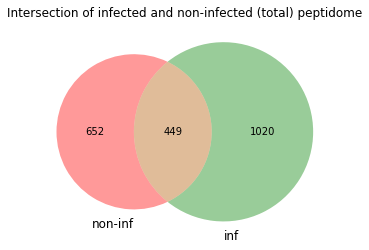

In [12]:
venn2([set(df_ninf['Peptide']), set(df_inf['Peptide'])], set_labels = ('non-inf', 'inf'))
plt.title('Intersection of infected and non-infected (total) peptidome')
biomarker=df_inf_same.merge(df_ninf_same,indicator = True, how='outer')
biomarker=df_inf_same.merge(df_ninf_same,indicator = True, how='outer')
biomarker=biomarker[['_merge','Peptide']].sort_values('_merge')
biomarker

Text(0.5, 1.0, 'Diagram of (intersected) peptidome of WF, infected and non-infected')

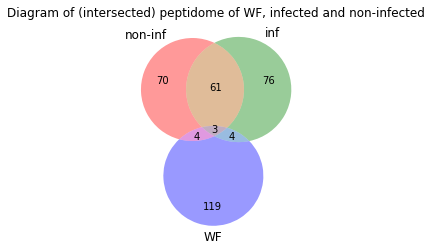

In [19]:
v=venn3([set(df_ninf_same['Peptide']), set(df_inf_same['Peptide']), set(df_WF_same['Peptide'])], set_labels = ('non-inf', 'inf', 'WF'))
plt.title('Diagram of (intersected) peptidome of WF, infected and non-infected')